<a href="https://colab.research.google.com/github/VishnuDuttSharma/occupancy_prediction/blob/main/AI2THOR_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

⚡ _Note_: AI2-THOR often runs significantly _slower_ using Colab's runtime than it does with a local runtime. However, in many cases, it is nice to explore without installing anything locally and not all devices are compatible with running AI2-THOR (e.g., Windows devices, tablets, phones).

In [ ]:
!pip install --upgrade ai2thor ai2thor-colab &> /dev/null
!pip install open3d &> /dev/null

In [ ]:
!curl https://raw.githubusercontent.com/VishnuDuttSharma/occupancy_prediction/main/helper.py?token=ABZ72EZKRBTDP3NMITZV6GLBSP2CM > helper.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23077  100 23077    0     0   135k      0 --:--:-- --:--:-- --:--:--  135k


In [ ]:
%load_ext autoreload
%autoreload 2

AI2-THOR Version: 3.5.1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%matplotlib inline
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

from helper import *

In [ ]:
controller = BotController()

INFO - 2021-11-15 22:25:57,884 - controller - Initialize return: {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}


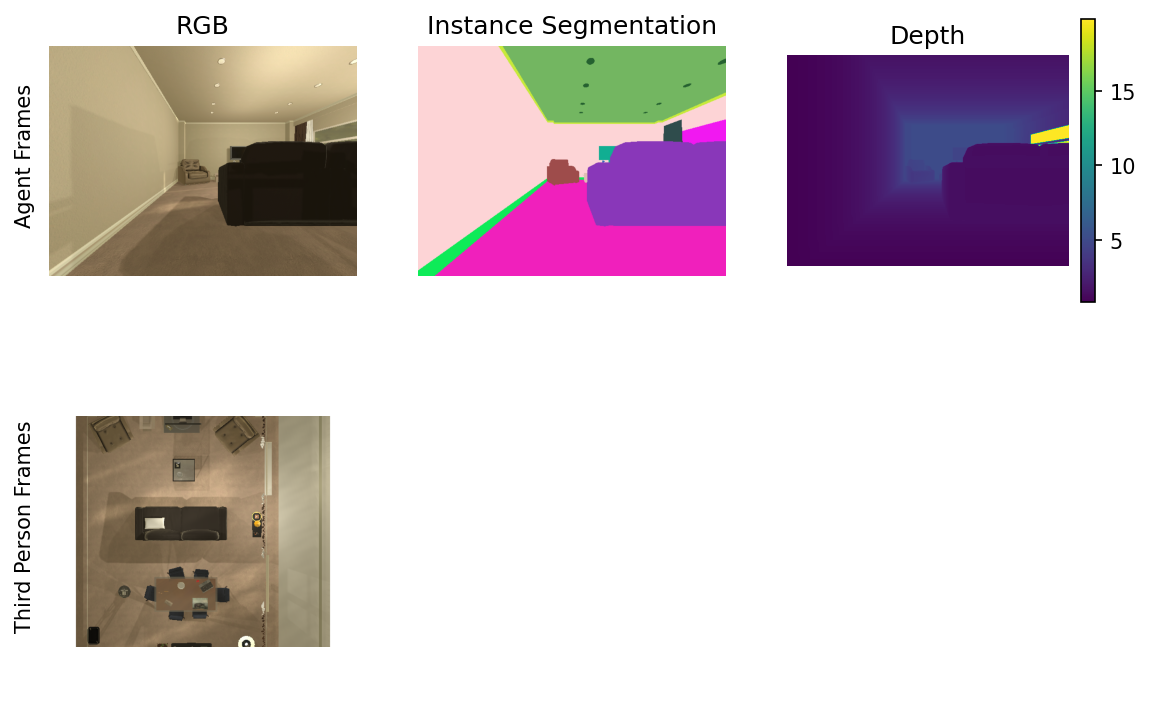

In [ ]:
controller.add_top_camera()
plot_frames(controller.controller.last_event)

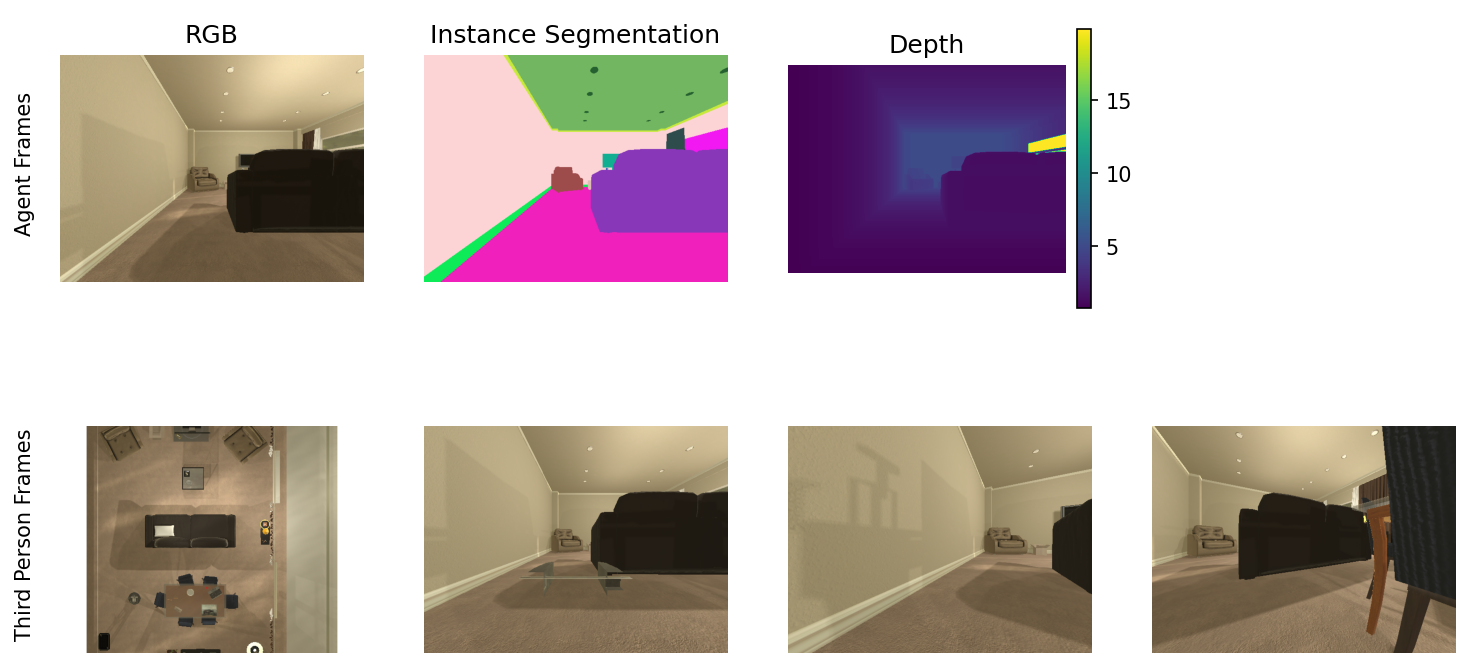

In [ ]:
controller.add_side_cameras()
plot_frames(controller.controller.last_event)

In [ ]:
controller.extra_cameras

{'Center': 1, 'Left': 3, 'Right': 2, 'Top': 0}

In [ ]:
# controller.goto_random_pos()
# plot_frames(controller.controller.last_event)

In [ ]:
# controller.goto_random_pos()
# plot_frames(controller.controller.last_event)

In [ ]:
len(controller.get_reacheble_pos())

1603

In [ ]:
controller.controller.last_event.metadata['agent']

{'cameraHorizon': -0.0,
 'inHighFrictionArea': False,
 'isStanding': None,
 'name': 'agent',
 'position': {'x': -4.0, 'y': 0.9026570916175842, 'z': 1.5},
 'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0}}

In [ ]:
controller.controller.last_event.metadata['thirdPartyCameras']

[{'fieldOfView': 90.0,
  'position': {'x': -1.7886080741882324, 'y': 2.5, 'z': 3.196234941482544},
  'rotation': {'x': 90.0, 'y': 0.0, 'z': 0.0},
  'thirdPartyCameraId': 0},
 {'fieldOfView': 90.0,
  'position': {'x': -4.0, 'y': 0.5, 'z': 1.5},
  'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0},
  'thirdPartyCameraId': 1},
 {'fieldOfView': 90.0,
  'position': {'x': -4.300000190734863, 'y': 0.5, 'z': 1.5},
  'rotation': {'x': 0.0, 'y': 330.0, 'z': 0.0},
  'thirdPartyCameraId': 2},
 {'fieldOfView': 90.0,
  'position': {'x': -3.700000047683716, 'y': 0.5, 'z': 1.5},
  'rotation': {'x': -0.0, 'y': 30.000001907348633, 'z': 0.0},
  'thirdPartyCameraId': 3}]

In [ ]:
# positions = controller.get_reacheble_pos()
# position = random.choice(positions)
# event = controller.controller.step(
#             action="Teleport",
#             position=position
#         )
controller.tp_side_shift

0.3

In [ ]:
# event.metadata['agent']['projectionMatrix']


print(projectionMatrix)
print(projectionMatrix_inverse)

[[ 1.29903805  0.          0.          0.        ]
 [ 0.          1.73205078  0.          0.        ]
 [ 0.          0.         -1.0100503  -0.20100503]
 [ 0.          0.         -1.          0.        ]]
[[ 0.76980036  0.          0.          0.        ]
 [ 0.          0.57735026  0.          0.        ]
 [-0.         -0.         -0.         -1.        ]
 [ 0.          0.         -4.9749999   5.0250001 ]]


In [ ]:
intrinsic = controller.get_intrinsic_matric()

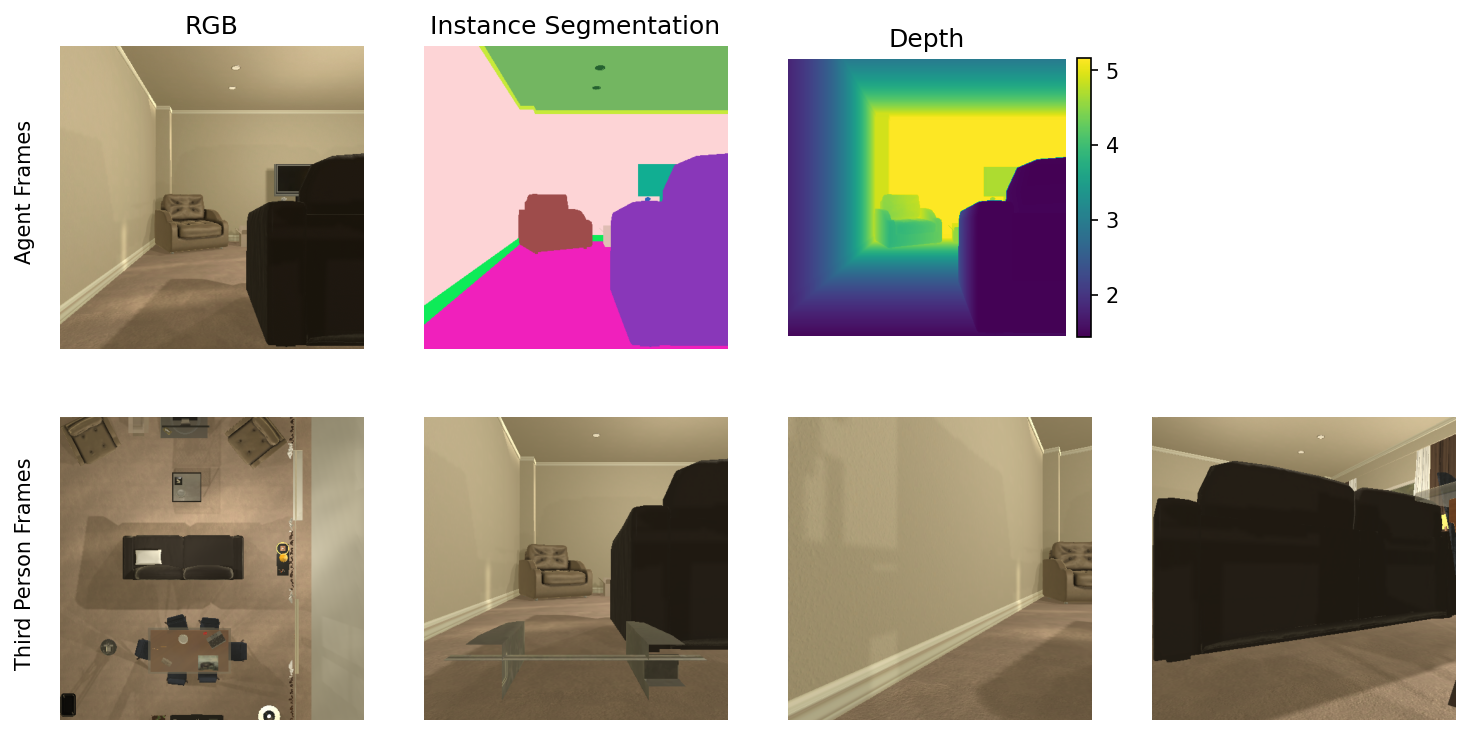

In [ ]:
plot_frames(controller.controller.last_event)

In [ ]:
floor_color = [x['color'] for x in controller.controller.last_event.metadata['colors'] if 'floor' in x['name'].lower()]
ceiling_color = [x['color'] for x in controller.controller.last_event.metadata['colors'] if 'ceiling' in x['name'].lower()]

In [ ]:
controller.update_side_cameras()
img_dict = controller.get_images()

controller.intrinsic.intrinsic_matrix

array([[320.,   0., 320.],
       [  0., 240., 240.],
       [  0.,   0.,   1.]])

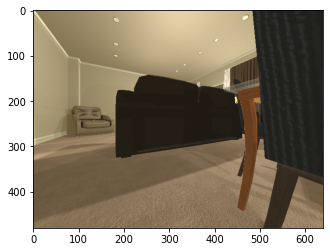

In [ ]:
plt.imshow(img_dict['scene']['Left'])

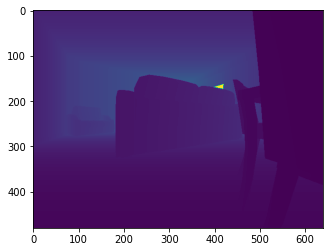

In [ ]:
plt.imshow(img_dict['depth']['Left'])

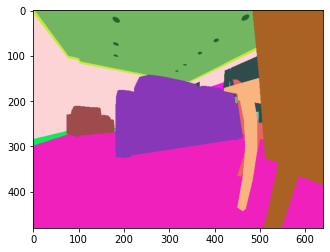

In [ ]:
plt.imshow(img_dict['segment']['Left'])

In [ ]:

# # bool_img = np.zeros(seg_img.shape[:2], np.bool)
# bool_img = np.zeros(scene_img.shape[:2], np.bool)

# # for color in floor_color:
# #     bool_img = np.logical_or(bool_img, (scene_img == np.array(color)).all(axis=2))

# bool_img = np.logical_or(bool_img, (scene_img == np.array(floor_color[4])).all(axis=2))

# plt.imshow(bool_img)

# controller.controller.last_event.metadata['visibleRange']
dummyBot = BotController()

AI2-THOR Version: 3.5.1


WARNING - 2021-11-14 00:44:44,063 - warnings - /usr/local/lib/python3.7/dist-packages/ai2thor/controller.py:681: UserWarning: On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'.
  "On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'."

INFO - 2021-11-14 00:44:58,607 - controller - Initialize return: {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}


In [ ]:
ceiling_color

[[115, 182, 97], [50, 55, 251], [37, 97, 48], [230, 113, 120]]

In [ ]:
dummy = depth_img.copy()
dummy[bool_img] = 1000.
plt.imshow(dummy)

NameError: ignored

In [ ]:
def change_intrinsic():
    width = controller.controller.last_event.metadata['screenWidth']
    height = controller.controller.last_event.metadata['screenHeight']

    fov = controller.controller.last_event.metadata['fov']
    def to_rad(th):
        return th*math.pi / 180

    # Convert fov to focal length
    focal_length_x = 0.5 * width * math.tan(to_rad(fov/2))
    # focal_length_y = 0.5 * height * math.tan(to_rad(fov/2))
    focal_length_y = focal_length_x

    # camera intrinsics
    fx, fy, cx, cy = (focal_length_x, focal_length_y, width/2, height/2)
    # fx, fy = 1.73205078*320/3, 1.29903805*320/3
    # fx, fy = 1.73205078, 1.29903805
    # cx, cy = 0, 0
    # width = 1.
    # height = 1.

    controller.intrinsic = o3d.camera.PinholeCameraIntrinsic(width, height, fx, fy, cx, cy)
    

In [ ]:
controller.controller.last_event.metadata['thirdPartyCameras']

[{'fieldOfView': 90.0,
  'position': {'x': -1.7886080741882324, 'y': 2.5, 'z': 3.196234941482544},
  'rotation': {'x': 90.0, 'y': 0.0, 'z': 0.0},
  'thirdPartyCameraId': 0},
 {'fieldOfView': 60.0,
  'position': {'x': -4.0, 'y': 0.5, 'z': 1.5},
  'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0},
  'thirdPartyCameraId': 1},
 {'fieldOfView': 60.0,
  'position': {'x': -4.300000190734863, 'y': 0.5, 'z': 1.5},
  'rotation': {'x': 0.0, 'y': 330.0, 'z': 0.0},
  'thirdPartyCameraId': 2},
 {'fieldOfView': 60.0,
  'position': {'x': -3.700000047683716, 'y': 0.5, 'z': 1.5},
  'rotation': {'x': -0.0, 'y': 30.000001907348633, 'z': 0.0},
  'thirdPartyCameraId': 3}]

In [ ]:
change_intrinsic()
controller.intrinsic.intrinsic_matrix

# 6*0.5*math.tan(to_rad(60/2)), 4.5*0.5*math.tan(to_rad(60/2))

array([[320.,   0., 320.],
       [  0., 320., 240.],
       [  0.,   0.,   1.]])

In [ ]:
import copy
def get_point_cloud(color_img, depth_img):
    color = o3d.geometry.Image(color_img.astype(np.uint8))
    depth = o3d.geometry.Image(depth_img)
    rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color, depth,
                                                        depth_scale=1.0,
                                                        # depth_trunc=0.7,
                                                        depth_trunc=10.0,
                                                        convert_rgb_to_intensity=False)
    
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, controller.intrinsic)#, extrinsic=cameraToWorldMatrix)
    # pcd.transform([[1, 0, 0, 0],
    #         [0, -1, 0, 0],
    #         [0, 0, -1, 0],
    #         [0, 0, 0, 1]])

    return pcd

In [ ]:
# scene_img = img_dict['scene']['Center']
scene_img = img_dict['segment']['Center']
depth_img = img_dict['depth']['Center']
# del my_pcd
my_pcd = get_point_cloud(scene_img, depth_img)

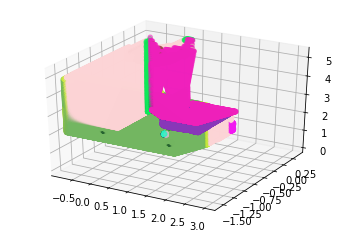

In [ ]:
points_np = np.array(my_pcd.points)
ax = plt.axes(projection='3d')
ax.scatter3D(points_np[:,0], points_np[:,1], points_np[:,2], c=my_pcd.colors);

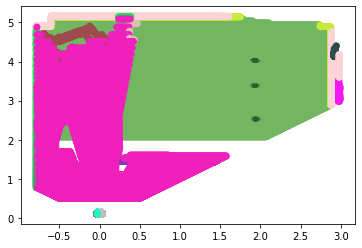

In [ ]:
plt.scatter(points_np[:,0], points_np[:,2], c=my_pcd.colors)

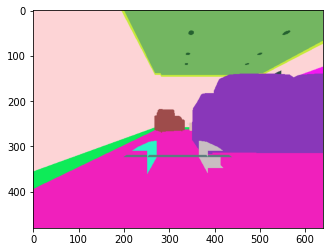

In [ ]:
# scene_img = img_dict['scene']['Center']
scene_img = img_dict['segment']['Center']
depth_img = img_dict['depth']['Center']

orig_pcd = get_point_cloud(scene_img, depth_img)
plt.imshow(scene_img)

In [ ]:
def point_filter(pcd, exclusion_list):
    points = np.asarray(pcd.points)
    colors = np.asarray(pcd.colors)

    filter = np.zeros((len(colors),), dtype=np.bool)

    for col in exclusion_list:
        filter += (colors == np.array(col)/255.).all(axis=1)

    return ~filter #pcd.select_by_index(filter[:,0])

In [ ]:
dummy_pcd = copy.copy(my_pcd)

filter = point_filter(dummy_pcd, floor_color+ceiling_color)
dummy_pcd = dummy_pcd.select_by_index(np.where(filter == True)[0])

orig_pcd = copy.copy(dummy_pcd)

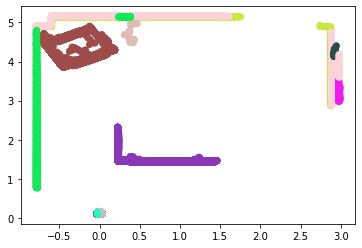

In [ ]:
points_np = np.array(orig_pcd.points)
plt.scatter(points_np[:,0], points_np[:,2], c=dummy_pcd.colors)

In [ ]:
df = controller.get_object_table()
print(df[df.objectType == 'Sofa']['position'].values)
print(df[df.objectType == 'Sofa']['rotation'].values)

[{'x': -2.404688596725464, 'y': -0.0033458173274993896, 'z': 3.4172074794769287}]
[{'x': -2.555888158894959e-07, 'y': 359.9854431152344, 'z': -3.019637370016426e-05}]


In [ ]:
controller.controller.last_event.metadata['agent']

{'cameraHorizon': -0.0,
 'inHighFrictionArea': False,
 'isStanding': None,
 'name': 'agent',
 'position': {'x': -4.0, 'y': 0.9026570916175842, 'z': 1.5},
 'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0}}

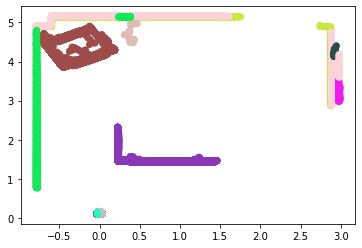

In [ ]:
points_np = np.array(orig_pcd.points)
plt.scatter(points_np[:,0], points_np[:,2], c=orig_pcd.colors)

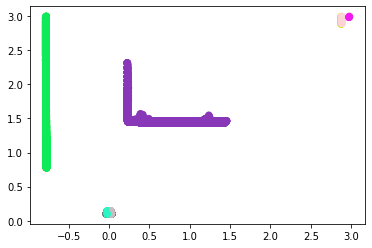

In [ ]:
points_np = np.array(orig_pcd.points)
new_points = points_np.copy()

filter = (new_points[:,0] < 4) & (new_points[:,0] > -1) & (new_points[:,2] < 3)
new_points = new_points[filter]

plt.scatter(new_points[:,0], new_points[:,2], c=np.asarray(orig_pcd.colors)[list(filter)])

In [ ]:
def to_rad(th):
    return th*math.pi / 180

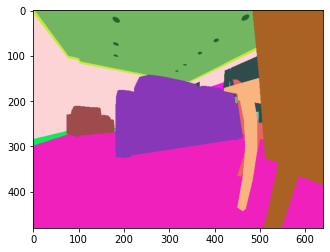

In [ ]:
# scene_img = img_dict['scene']['Left']
scene_img = img_dict['segment']['Left']
depth_img = img_dict['depth']['Left']

orig_pcd = get_point_cloud(scene_img, depth_img)
filter = point_filter(orig_pcd, floor_color+ceiling_color)
orig_pcd = orig_pcd.select_by_index(np.where(filter == True)[0])

plt.imshow(scene_img)

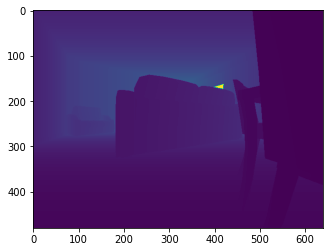

In [ ]:
plt.imshow(depth_img)

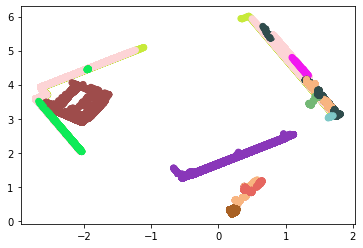

In [ ]:
orig_points = np.asarray(orig_pcd.points)
plt.scatter(orig_points[:,0], orig_points[:,2], c=orig_pcd.colors)
# plt.xlim(-6,6)
# plt.ylim(0,12)

In [ ]:
# orig_points[:,0] /= 480
(orig_points[:,0].min()+orig_points[:,0].max())/2, (orig_points[:,2].min()+orig_points[:,2].max())/2, -controller.tp_height

(-0.45406423583626754, 3.1062749475240707, -0.5)

In [ ]:
dummy_pcd = copy.copy(orig_pcd)

filter = point_filter(dummy_pcd, floor_color+ceiling_color)
dummy_pcd = dummy_pcd.select_by_index(np.where(filter == True)[0])

# dummy_pcd = dummy_pcd.translate([-(orig_points[:,0].min()+orig_points[:,0].max())/2, -controller.tp_height, -(orig_points[:,2].min()+orig_points[:,2].max())/2])
# R = np.linalg.inv(o3d.geometry.get_rotation_matrix_from_xyz((0, -np.pi*30./180, 0)))
R = o3d.geometry.get_rotation_matrix_from_xyz((0., to_rad(30), 0.))
dummy_pcd = dummy_pcd.rotate(R, center=(0., 0., 0.))#( (orig_points[:,0].min()+orig_points[:,0].max())/2, (orig_points[:,2].min()+orig_points[:,2].max())/2, -controller.tp_height)

# dummy_pcd = dummy_pcd.translate([-controller.tp_side_shift, 0., 0.])

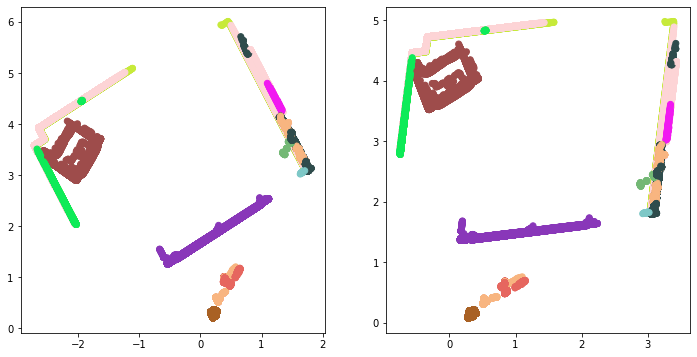

In [ ]:
figs, axes = plt.subplots(1,2, figsize=(12,6))

orig_points = np.asarray(orig_pcd.points)
axes[0].scatter(orig_points[:,0], orig_points[:,2], c=orig_pcd.colors)
# axes[0].axis('equal')
# axes[0].set_xlim([-10, 10])
# axes[0].set_ylim([-10, 10])
dummy_points = np.asarray(dummy_pcd.points)
axes[1].scatter(dummy_points[:,0], dummy_points[:,2], c=dummy_pcd.colors)
# axes[1].axis('equal')
# axes[1].set_xlim([-10, 10])
# axes[1].set_ylim([-10, 10])

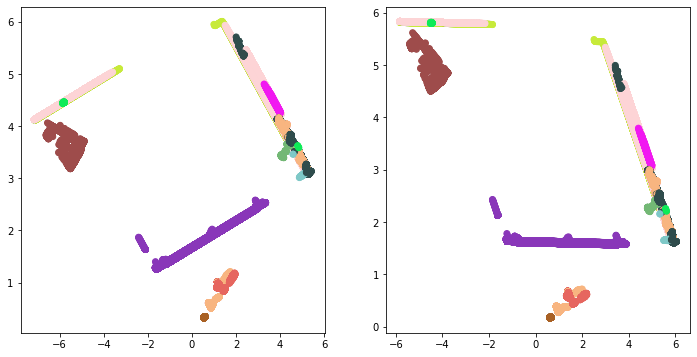

In [ ]:

figs, axes = plt.subplots(1,2, figsize=(12,6))

points_2d = orig_points[:,[0,2]]
axes[0].scatter(points_2d[:,0], points_2d[:,1], c=orig_pcd.colors)

ang = -15
rot_mat = np.array([[np.cos(to_rad(ang)), -np.sin(to_rad(ang))],
                    [np.sin(to_rad(ang)), np.cos(to_rad(ang))]])

points_2d = orig_points[:,[0,2]]
points_2d = (rot_mat @ points_2d.T).T

axes[1].scatter(points_2d[:,0], points_2d[:,1], c=orig_pcd.colors)

In [ ]:
width = controller.controller.last_event.metadata['screenWidth']
height = controller.controller.last_event.metadata['screenHeight']


fov = controller.controller.last_event.metadata['fov']
def to_rad(th):
    return th*math.pi / 180

# Convert fov to focal length
focal_length_x = 0.5 * width * math.tan(to_rad(fov/2))
focal_length_y = 0.5 * height * math.tan(to_rad(fov/2))

# camera intrinsics
fx, fy, cx, cy = (focal_length_x, focal_length_y, width//2, height//2)

controller.intrinsic = o3d.camera.PinholeCameraIntrinsic(width, height, fx, fy, cx, cy)

print(width, height)
print(fov)
print(focal_length_x, focal_length_y)
print(cx, cy)

640 480
60.0
184.75208614068023 138.56406460551017
320 240


(-715.5582090500367, 560.1007447119781, -322.9302312904554, 414.83248949280846)

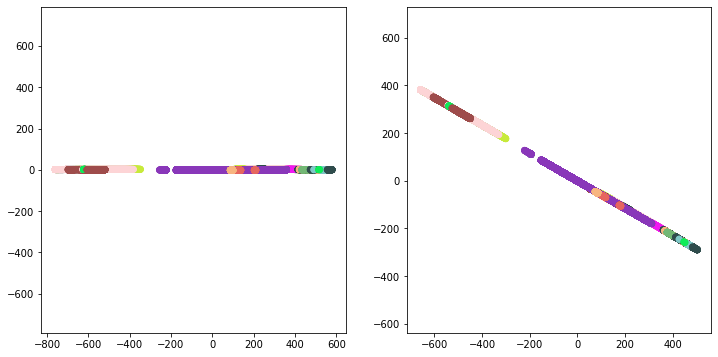

In [ ]:
# dummy_points = np.asarray(dummy_pcd.points)
# plt.scatter(dummy_points[:,0], dummy_points[:,2], c=dummy_pcd.colors)
# intrinsic.get_focal_length()

orig_pcd = get_point_cloud(scene_img, depth_img)
filter = point_filter(orig_pcd, floor_color+ceiling_color)
orig_pcd = orig_pcd.select_by_index(np.where(filter == True)[0])

dummy_pcd = copy.copy(orig_pcd)

filter = point_filter(dummy_pcd, floor_color+ceiling_color)
dummy_pcd = dummy_pcd.select_by_index(np.where(filter == True)[0])

# dummy_pcd = dummy_pcd.translate([0., -controller.tp_side_shift, 0.])
# R = np.linalg.inv(o3d.geometry.get_rotation_matrix_from_xyz((0, -np.pi*30./180, 0)))
R = o3d.geometry.get_rotation_matrix_from_xyz((0., np.pi*30./180, 0))
dummy_pcd = dummy_pcd.rotate(R, center=(0, controller.tp_height, 0))

figs, axes = plt.subplots(1,2, figsize=(12,6))

orig_points = np.asarray(orig_pcd.points)
axes[0].scatter(orig_points[:,0], orig_points[:,2], c=orig_pcd.colors)
axes[0].axis('equal')
dummy_points = np.asarray(dummy_pcd.points)
axes[1].scatter(dummy_points[:,0], dummy_points[:,2], c=dummy_pcd.colors)
axes[1].axis('equal')


In [ ]:
controller.controller.last_event.metadata['thirdPartyCameras']

[]

In [ ]:
controller.controller.last_event.metadata.keys()

dict_keys(['objects', 'isSceneAtRest', 'agent', 'heldObjectPose', 'arm', 'fov', 'cameraPosition', 'cameraOrthSize', 'thirdPartyCameras', 'collided', 'collidedObjects', 'inventoryObjects', 'sceneName', 'lastAction', 'errorMessage', 'errorCode', 'lastActionSuccess', 'screenWidth', 'screenHeight', 'agentId', 'colors', 'colorBounds', 'flatSurfacesOnGrid', 'distances', 'normals', 'isOpenableGrid', 'segmentedObjectIds', 'objectIdsInBox', 'actionIntReturn', 'actionFloatReturn', 'actionStringsReturn', 'actionFloatsReturn', 'actionVector3sReturn', 'visibleRange', 'currentTime', 'sceneBounds', 'actionReturn'])

In [ ]:
import cv2

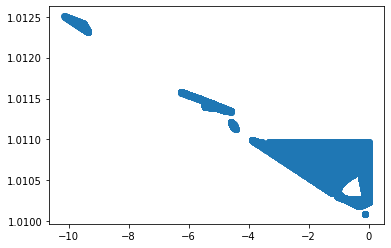

In [ ]:
Image3D = cv2.reprojectImageTo3D(depth_img*255., projectionMatrix)
flat_points = Image3D.reshape(-1,3)
plt.scatter(flat_points[:,0], flat_points[:,2])

In [ ]:
orig_points_1 = np.array(orig_pcd.points)

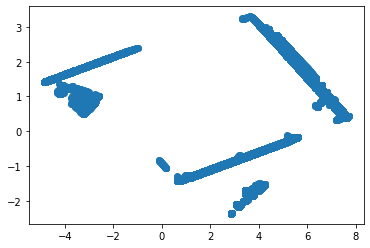

In [ ]:
plt.scatter(orig_points_1[:,0], orig_points_1[:,2])

In [ ]:
# projectionMatrix.shape
1/0.2010050266981125

AI2-THOR Version: 3.5.1


4.97499996108003

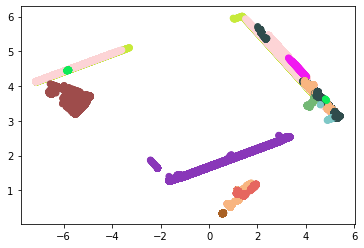

In [ ]:
color = o3d.geometry.Image(scene_img.astype(np.uint8))
depth = o3d.geometry.Image(depth_img)
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color, depth,
                                                    depth_scale=1.0,
                                                    # depth_trunc=0.7,
                                                    depth_trunc=10.0,
                                          
                                                    convert_rgb_to_intensity=False)


my_intrinsic = o3d.camera.PinholeCameraIntrinsic(0, 0, 1, 1, 0, 0)
my_pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, intrinsic=controller.intrinsic)#, extrinsic=projectionMatrix)

filter = point_filter(my_pcd, floor_color+ceiling_color)
my_pcd = my_pcd.select_by_index(np.where(filter == True)[0])

my_points = np.asarray(my_pcd.points)
plt.scatter(my_points[:,0], my_points[:,2], c=my_pcd.colors)


In [ ]:
projectionMatrix_inverse = np.array([[0.7698003649711609, 0.0, 0.0, 0.0],
                                    [0.0, 0.5773502588272095, 0.0, 0.0],
                                    [0.0, 0.0, -4.974999904632568, 5.025000095367432],
                                     [-0.0, -0.0, -1.0, -0.0],
                                    ])

In [ ]:
xv, yv = np.meshgrid(np.arange(depth_img.shape[1]), np.arange(depth_img.shape[0]), indexing='xy')
hom_data = np.stack([xv ,yv, depth_img, np.ones(xv.shape)]).transpose(1,2,0)

filter = hom_data[:,:,2] < 10.0
hom_data = hom_data[filter]
col_img = scene_img[filter]/255.


filter = np.zeros((len(col_img),), dtype=np.bool)

for col in floor_color+ceiling_color:
    filter += (col_img == np.array(col)/255.).all(axis=1)

hom_data = hom_data[~filter]
col_img = col_img[~filter]

height, width = depth_img.shape[:2]

hom_data[:,0] = (hom_data[:,0] - width//2)/width
hom_data[:,1] = (hom_data[:,1] - height//2)/height

In [ ]:
# hom_data.shape, col_img.shape
# np.linalg.inv(projectionMatrixe)
# -1.0100502967834473, -0.2010050266981125

# 1/-0.2010050266981125, -1.010050296783447/ -0.2010050266981125


array([-3.59694934, -3.60178192, -3.60615539, ...,  0.71169067,
        0.71156932,  0.711413  ])

In [ ]:
hom_data[:,3]

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
output = projectionMatrix_inverse @ hom_data.reshape(-1,4).T # cameraToWorldMatrix

output = output.T

output[:,0:2] *= output[:,2:3]



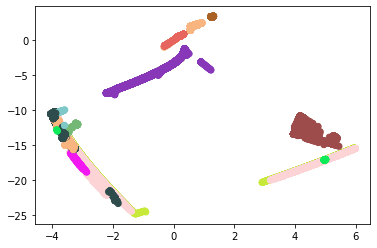

In [ ]:
# plt.scatter(output[:,0]/output[:,3], output[:,2]/output[:,3])
plt.scatter(output[:,0], output[:,2], c=col_img)

In [ ]:
output[:,3:4].max()

-0.3210813105106354

In [ ]:
cv3_points = cv2.reprojectImageTo3D(depth_img, projectionMatrix)
hom_data = cv3_points.copy()

filter = hom_data[:,:,2] < 10.0
hom_data = hom_data[filter]
col_img = scene_img[filter]/255.


filter = np.zeros((len(col_img),), dtype=np.bool)

for col in floor_color+ceiling_color:
    filter += (col_img == np.array(col)/255.).all(axis=1)

hom_data = hom_data[~filter]
col_img = col_img[~filter]

# height, width = depth_img.shape[:2]

# hom_data[:,0] = (hom_data[:,0] - width//2)/width
# hom_data[:,1] = (hom_data[:,1] - height//2)/height

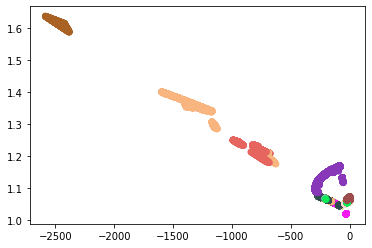

In [ ]:
# plt.scatter(output[:,0]/output[:,3], output[:,2]/output[:,3])
plt.scatter(hom_data[:,0], hom_data[:,2], c=col_img)

In [ ]:
projectionMatrix, cameraToWorldMatrix, controller.intrinsic.intrinsic_matrix

(array([[ 1.29903805,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  1.73205078,  0.        ,  0.        ],
        [ 0.        ,  0.        , -1.0100503 , -0.20100503],
        [ 0.        ,  0.        , -1.        ,  0.        ]]),
 array([[ 1.        ,  0.        ,  0.        , -2.29999995],
        [ 0.        ,  1.        ,  0.        ,  0.8714571 ],
        [-0.        , -0.        , -1.        ,  2.70000005],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[184.75208614,   0.        , 320.        ],
        [  0.        , 138.56406461, 240.        ],
        [  0.        ,   0.        ,   1.        ]]))

In [ ]:
184.75208614/1.29903805, 138.56406461/1.73205078, 184.75208614/138.56406461, 1.29903805/1.73205078

(142.22222831733063, 80.00000127594411, 1.3333333332852206, 0.7499999797927402)

In [ ]:
o3d.camera.PinholeCameraParameters

In [ ]:
controller.intrinsic.intrinsic_matrix

array([[184.75208614,   0.        , 320.        ],
       [  0.        , 138.56406461, 240.        ],
       [  0.        ,   0.        ,   1.        ]])

In [ ]:
0.5 * math.tan(to_rad(140/2))

1.3737387097273108

In [ ]:
1.299038052558899/1.7320507764816284, 480/640

(0.7499999827936208, 0.75)

In [ ]:
184.75208614/1.7320507764816284, 138.56406461/1.299038052558899  

(106.66666858075199, 106.66667103173057)

In [ ]:
3*184.75208614/1.7320507764816284

320.00000574225595

In [ ]:
?left = -0.2
right = 0.2
top = 0.2;
bottom = -0.2; 
near = 0 #0.1 # https://github.com/allenai/ai2thor/blob/b9d14e5a1ba5e10ddd26323d14337cd5692ae1f9/ai2thor/server.py#L331
far = 1 #20. #1000.


x = 2.0 * near / (right - left);
y = 2.0 * near / (top - bottom);
a = (right + left) / (right - left);
b = (top + bottom) / (top - bottom);
c = -(far + near) / (far - near);
d = -(2.0 * far * near) / (far - near);
e = -1.0
m = np.zeros((4,4))
m[0, 0] = x;
m[0, 1] = 0;
m[0, 2] = a;
m[0, 3] = 0;
m[1, 0] = 0;
m[1, 1] = y;
m[1, 2] = b;
m[1, 3] = 0;
m[2, 0] = 0;
m[2, 1] = 0;
m[2, 2] = c;
m[2, 3] = d;
m[3, 0] = 0;
m[3, 1] = 0;
m[3, 2] = e;
m[3, 3] = 0;

print(m)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -1. -0.]
 [ 0.  0. -1.  0.]]


In [ ]:
%ls /usr/lib/python3.6/distutils/

archive_util.py     debug.py         file_util.py      spawn.py
bcppcompiler.py     dep_util.py      __init__.py       sysconfig.py
ccompiler.py        dir_util.py      log.py            text_file.py
cmd.py              dist.py          msvc9compiler.py  unixccompiler.py
command/            errors.py        _msvccompiler.py  util.py
config.py           extension.py     msvccompiler.py   versionpredicate.py
core.py             fancy_getopt.py  __pycache__/      version.py
cygwinccompiler.py  filelist.py      README


In [ ]:
ai2thor.__file__

'/usr/local/lib/python3.7/dist-packages/ai2thor/__init__.py'

In [ ]:
%cd /usr/local/lib/python3.7/dist-packages/ai2thor/

/usr/local/lib/python3.7/dist-packages/ai2thor


In [ ]:


def ai2thor_calibration():
    bot_c = BotController(init_scene='FloorPlan1_physics')

    x_position = 0.999
    y_position = 1.01
    z_position = -0.3541

    x_rotation = 0
    y_rotation = 90
    z_rotation = 0

    event = bot_c.controller.step(action='TeleportFull', x=x_position, y=y_position, z=z_position, rotation=dict(x=x_rotation, y=y_rotation, z=z_rotation), horizon=30.0)
    
    agentMetadata = event.metadata['agent']

    depth_image = event.depth_frame
    depth_image /= np.max(depth_image)
    depth_image *= 255
    
    #fx = 259.807621135
    #fx = 150
    #fy = 130.412776076
    fx = 184.75208614068023

    fy = 0.1
    cx = 320# 150
    cy = 240 #150


    min_dif = 100
    saved_fy = 0.1

    while(fx < 500):
        while(fy < 500):
            rows,cols = event.depth_frame.shape
            c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
            valid = (depth_image > 0) & (depth_image < 255)
            z = np.where(valid, depth_image / 256.0, np.nan)
            x = np.where(valid, z * (c - cx) / fx, 0)
            y = np.where(valid, z * (r - cy) / fy, 0)

            pointcloud = np.dstack((x, y, z))


            p1_1 = np.array([pointcloud[200][150][0], pointcloud[200][150][1], pointcloud[200][150][2]])
            p2_1 = np.array([pointcloud[210][160][0], pointcloud[210][160][1], pointcloud[210][160][2]])
            p3_1 = np.array([pointcloud[210][140][0], pointcloud[210][140][1], pointcloud[210][140][2]])

            mid_1 = [(p1_1[0] + p2_1[0] + p3_1[0])/3, (p1_1[1] + p2_1[1] + p3_1[1])/3, (p1_1[2] + p2_1[2] + p3_1[2])/3]

            p1_2 = np.array([pointcloud[75][200][0], pointcloud[75][200][1], pointcloud[75][200][2]])
            p2_2 = np.array([pointcloud[85][210][0], pointcloud[85][210][1], pointcloud[85][210][2]])
            p3_2 = np.array([pointcloud[85][190][0], pointcloud[85][190][1], pointcloud[85][190][2]])

            mid_2 = [(p1_2[0] + p2_2[0] + p3_2[0])/3, (p1_2[1] + p2_2[1] + p3_2[1])/3, (p1_2[2] + p2_2[2] + p3_2[2])/3]

            v1_1 = p3_1 - p1_1
            v2_1 = p2_1 - p1_1

            cp_1 = np.cross(v1_1,v2_1)

            v1_2 = p3_2 - p1_2
            v2_2 = p2_2 - p1_2

            cp_2 = np.cross(v1_2,v2_2)				
            angle = np.arccos(np.dot(cp_1, cp_2) / (np.linalg.norm(cp_1) * np.linalg.norm(cp_2)))

            angle = np.degrees(angle)
            angle_dif = abs(90 - angle)
            if min_dif > angle_dif:
                min_dif = angle_dif
                saved_fy = fy

                #print(angle)

            fy = fy + 0.1

        fy = saved_fy

        print("Final fy")

        print(fy)

        rows,cols = event.depth_frame.shape
        c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
        valid = (depth_image > 0) & (depth_image < 255)
        z = np.where(valid, depth_image / 256.0, np.nan)
        x = np.where(valid, z * (c - cx) / fx, 0)
        y = np.where(valid, z * (r - cy) / fy, 0)


        pointcloud = np.dstack((x, y, z))


        p1_1 = np.array([pointcloud[200][150][0], pointcloud[200][150][1], pointcloud[200][150][2]])
        p2_1 = np.array([pointcloud[210][160][0], pointcloud[210][160][1], pointcloud[210][160][2]])
        p3_1 = np.array([pointcloud[210][140][0], pointcloud[210][140][1], pointcloud[210][140][2]])


        mid_1 = [(p1_1[0] + p2_1[0] + p3_1[0])/3, (p1_1[1] + p2_1[1] + p3_1[1])/3, (p1_1[2] + p2_1[2] + p3_1[2])/3]

        p1_2 = np.array([pointcloud[75][200][0], pointcloud[75][200][1], pointcloud[75][200][2]])
        p2_2 = np.array([pointcloud[85][210][0], pointcloud[85][210][1], pointcloud[85][210][2]])
        p3_2 = np.array([pointcloud[85][190][0], pointcloud[85][190][1], pointcloud[85][190][2]])


        mid_2 = [(p1_2[0] + p2_2[0] + p3_2[0])/3, (p1_2[1] + p2_2[1] + p3_2[1])/3, (p1_2[2] + p2_2[2] + p3_2[2])/3]

        v1_1 = p3_1 - p1_1
        v2_1 = p2_1 - p1_1

        cp_1 = np.cross(v1_1,v2_1)

        v1_2 = p3_2 - p1_2
        v2_2 = p2_2 - p1_2

        cp_2 = np.cross(v1_2,v2_2)

        angle = np.arccos(np.dot(cp_1, cp_2) / (np.linalg.norm(cp_1) * np.linalg.norm(cp_2)))
        angle = np.degrees(angle)

        print('Angle:', angle)
        cloud_points = []
        for i in range(0, rows):
            for j in range(0, cols):
                cloud_points.append([pointcloud[i][j][0], pointcloud[i][j][1], pointcloud[i][j][2]])

        cloud_points_subset = []
        cloud_points_subset.append([pointcloud[200][150][0], pointcloud[200][150][1], pointcloud[200][150][2]])
        cloud_points_subset.append([pointcloud[210][160][0], pointcloud[210][160][1], pointcloud[210][160][2]])
        cloud_points_subset.append([pointcloud[210][140][0], pointcloud[210][140][1], pointcloud[210][140][2]])
        cloud_points_subset.append([pointcloud[75][200][0], pointcloud[75][200][1], pointcloud[75][200][2]])
        cloud_points_subset.append([pointcloud[85][210][0], pointcloud[85][210][1], pointcloud[85][210][2]])
        cloud_points_subset.append([pointcloud[85][190][0], pointcloud[85][190][1], pointcloud[85][190][2]])

        # normal_1_points = []
        # p1 = Point()
        # p1.x = mid_1[0]
        # p1.y = mid_1[1]
        # p1.z = mid_1[2]

        # p2 = Point()
        # p2.x = (100*cp_1[0]) + mid_1[0]
        # p2.y = (100*cp_1[1]) + mid_1[1]
        # p2.z = (100*cp_1[2]) + mid_1[2]

        # normal_1_points.append(p1)
        # normal_1_points.append(p2)


        # normal_2_points = []
        # p11 = Point()
        # p11.x = mid_2[0]
        # p11.y = mid_2[1]
        # p11.z = mid_2[2]
        # p22 = Point()
        # p22.x = (100*cp_2[0]) + mid_2[0]
        # p22.y = (100*cp_2[1]) + mid_2[1]
        # p22.z = (100*cp_2[2]) + mid_2[2]
        # normal_2_points.append(p11)
        # normal_2_points.append(p22)


        #y_rotation = y_rotation - 5

        event = bot_c.controller.step(action='TeleportFull', x=x_position, y=y_position, z=z_position, rotation=dict(x=x_rotation, y=y_rotation, z=z_rotation), horizon=30.0)
        agentMetadata = event.metadata['agent']

        depth_image = event.depth_frame
        depth_image /= np.max(depth_image)
        depth_image *= 255


        fx = fx + 1
        fy = 0.1
        min_dif = 100
        saved_fy = 0.1


In [ ]:
ai2thor_calibration()

WARNING - 2021-11-11 16:53:49,830 - warnings - /usr/local/lib/python3.7/dist-packages/ai2thor/controller.py:681: UserWarning: On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'.
  "On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'."

INFO - 2021-11-11 16:54:07,279 - controller - Initialize return: {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}


Final fy
499.90000000004517
Angle: 0.2258997337247528
Final fy
499.90000000004517
Angle: 0.22710739783352585
Final fy
499.90000000004517
Angle: 0.22831482492008032
Final fy
499.90000000004517
Angle: 0.22952201374581752
Final fy
499.90000000004517
Angle: 0.23072896306257523
Final fy
499.90000000004517
Angle: 0.2319356716254348
Final fy
499.90000000004517
Angle: 0.2331421381801184
Final fy
499.90000000004517
Angle: 0.23434836149121094
Final fy
499.90000000004517
Angle: 0.23555434031226638
Final fy
499.90000000004517
Angle: 0.23676007340146962
Final fy
499.90000000004517
Angle: 0.23796555952303816
Final fy
499.90000000004517
Angle: 0.23917079743181818
Final fy
499.90000000004517
Angle: 0.24037578589321817
Final fy
499.90000000004517
Angle: 0.24158052366784574
Final fy
499.90000000004517
Angle: 0.24278500952062115
Final fy
499.90000000004517
Angle: 0.24398924221916446
Final fy
499.90000000004517
Angle: 0.24519322052628395
Final fy
499.90000000004517
Angle: 0.24639694321635253
Final fy
499.

KeyboardInterrupt: ignored

(-0.6, 0.6)

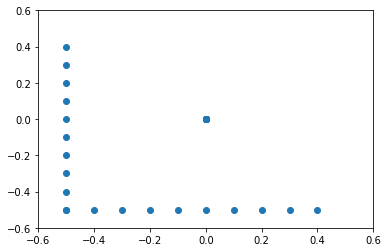

In [ ]:
x = np.zeros((20,3))
xyz[0:10,0] = list(np.arange(-0.5,0.5,0.1))
xyz[0:10,1] = -0.5
xyz[0:10,2] = 1.

xyz[10:20,0] = -0.5
xyz[10:20,1] = list(np.arange(-0.5,0.5,0.1))
xyz[10:20,2] = 2.


pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
pts = np.asarray(pcd.points)
plt.scatter(pts[:,0], pts[:,1])
plt.xlim((-0.6,0.6))
plt.ylim((-0.6,0.6))

(-1.0, 1.0)

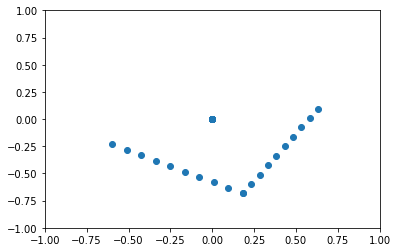

In [ ]:
R = o3d.geometry.get_rotation_matrix_from_xyz((0, 0, np.pi*60/180))
pcd = pcd.rotate(R, center=(0., 0., 0.))
pts = np.asarray(pcd.points)
plt.scatter(pts[:,0], pts[:,1])
plt.xlim((-1,1))
plt.ylim((-1,1))

[-0.5,
 -0.4,
 -0.30000000000000004,
 -0.20000000000000007,
 -0.10000000000000009,
 -1.1102230246251565e-16,
 0.09999999999999987,
 0.19999999999999984,
 0.2999999999999998,
 0.3999999999999998]

# TO-DOs
- [ ] Realign TP cameras and merge data 
- [ ] Get occupancy map (+ for data, - for floor and ceiling)
- [ ] Generate baseline data using heights
- [ ] Get a working UNet model 

In [ ]:
!find / -name unity 2> /dev/null

In [ ]:
!git clone https://github.com/allenai/ai2thor.git

Cloning into 'ai2thor'...
remote: Enumerating objects: 146919, done.
remote: Counting objects: 100% (5924/5924), done.
remote: Compressing objects: 100% (1067/1067), done.
remote: Total 146919 (delta 4871), reused 5892 (delta 4852), pack-reused 140995
Receiving objects: 100% (146919/146919), 6.42 GiB | 22.96 MiB/s, done.
Resolving deltas: 100% (112894/112894), done.
Checking out files: 100% (18745/18745), done.


In [ ]:
%cd ai2thor/

/content/ai2thor


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating ai2thor.egg-info
writing ai2thor.egg-info/PKG-INFO
writing dependency_links to ai2thor.egg-info/dependency_links.txt
writing requirements to ai2thor.egg-info/requires.txt
writing top-level names to ai2thor.egg-info/top_level.txt
writing manifest file 'ai2thor.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'ai2thor.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ai2thor
copying ai2thor/downloader.py -> build/lib/ai2thor
copying ai2thor/robot_controller.py -> build/lib/ai2thor
copying ai2thor/controller.py -> build/lib/ai2thor
copying ai2thor/platform.py -> build/lib/ai2thor
copying ai2thor/mock_real_server.py -> build/lib/ai2thor
copying ai2thor/wsgi_server.py -> build/lib/ai2thor
copying ai2thor/exceptions.py -> build/lib/ai2thor
copying ai2th

In [ ]:
import ai2thor

In [ ]:
from helper import *

In [ ]:
bot = BotController()

WARNING - 2021-11-09 20:26:51,579 - warnings - /usr/local/lib/python3.7/dist-packages/ai2thor/controller.py:681: UserWarning: On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'.
  "On reset and upon initialization, agentMode='bot' has been renamed to agentMode='locobot'."

INFO - 2021-11-09 20:27:08,831 - controller - Initialize return: {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}


In [ ]:
bot.controller.step(action='Pass')

<ai2thor.server.Event at 0x7f9dc4ddc1d0
    .metadata["lastAction"] = Pass
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

In [ ]:
bot.controller.last_event.metadata['agent'].keys()

dict_keys(['name', 'position', 'rotation', 'cameraHorizon', 'isStanding', 'inHighFrictionArea'])